# 3.3: Interactions

In [1]:
from __future__ import print_function, division
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# use matplotlib style sheet
plt.style.use('ggplot')

# import statsmodels for R-style regression
import statsmodels.formula.api as smf

## Read the data

Data are in the *child.iq* directory of the ARM_Data download-- you might have
to change the path I use below to reflect the path on your computer.

In [2]:
kidiq  = pd.read_stata("../../ARM_Data/child.iq/kidiq.dta")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


## Regression -- interactions, Pg 34

In [3]:
fit = smf.ols('kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq', data=kidiq).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Wed, 29 Jul 2015   Prob (F-statistic):           3.07e-24
Time:                        15:25:10   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -11.4820     13.758     -0.835

## Figure 3.4(a), Pg 35

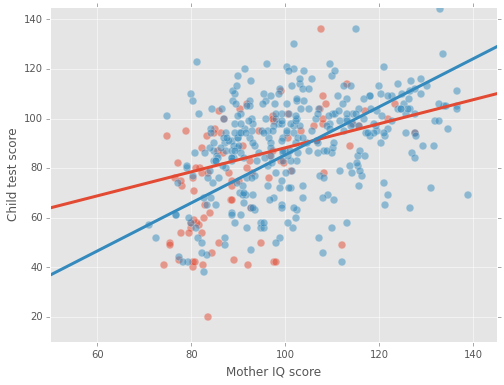

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
# set for x-range used below
iq_linspace = np.linspace(50, 145, 50)

# default color cycle
colors = plt.rcParams['axes.color_cycle']

# mom_hs == 0
hs0 = (kidiq['mom_hs'] == 0)
plt.scatter(kidiq[hs0]['mom_iq'], kidiq[hs0]['kid_score'],
            s=60, alpha=0.5, c=colors[0])
# mom_hs == 1
hs1 = (kidiq['mom_hs'] == 1)
plt.scatter(kidiq[hs1]['mom_iq'], kidiq[hs1]['kid_score'],
            s=60, alpha=0.5, c=colors[1])

# add fits
# mom_hs == 1
plt.plot(iq_linspace, fit.params[0] + fit.params[1] * 1. + 
         (fit.params[2] + fit.params[3])* iq_linspace,
         lw=3, c=colors[0])
# mom_hs == 0
plt.plot(iq_linspace, fit.params[0] + fit.params[2] * iq_linspace,
         lw=3, c=colors[1])

plt.ylim([10, 145])
plt.xlim([50, 145])
plt.xlabel("Mother IQ score")
plt.ylabel("Child test score")

## Figure 3.4(b), Pg 35

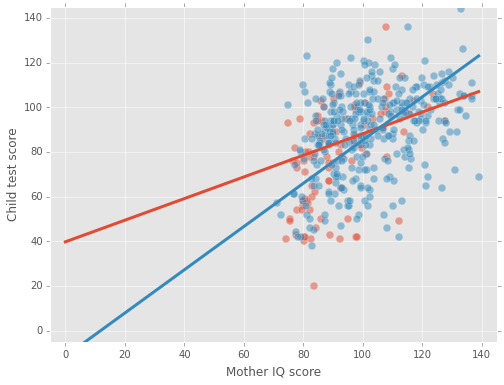

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
# create x-axis point to zero
iq_linspace = np.linspace(0., kidiq['mom_iq'].max(), 50)

# default color cycle
colors = plt.rcParams['axes.color_cycle']

# mom_hs == 0
hs0 = (kidiq['mom_hs'] == 0)
plt.scatter(kidiq[hs0]['mom_iq'], kidiq[hs0]['kid_score'],
            s=60, alpha=0.5, c=colors[0])
# mom_hs == 1
hs1 = (kidiq['mom_hs'] == 1)
plt.scatter(kidiq[hs1]['mom_iq'], kidiq[hs1]['kid_score'],
            s=60, alpha=0.5, c=colors[1])

# add fits
# mom_hs == 1
plt.plot(iq_linspace, fit.params[0] + fit.params[1] * 1. + 
         (fit.params[2] + fit.params[3])* iq_linspace,
         lw=3, c=colors[0])
# mom_hs == 0
plt.plot(iq_linspace, fit.params[0] + fit.params[2] * iq_linspace,
         lw=3, c=colors[1])

plt.ylim([-5, 145])
plt.xlim([-5, 145])
plt.xlabel("Mother IQ score")
plt.ylabel("Child test score")